In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = sns.load_dataset('iris')
df.shape


(150, 5)

In [3]:
col = ['petal_length','petal_width','species']

In [4]:
df.loc[:,col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [5]:
 df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [7]:
species_to_num = {'setosa':0,
                 'versicolor':1,
                 'virginica':2}
df['tmp'] = df['species'].map(species_to_num)
y= df['tmp']

In [8]:
C = 1
clf = svm.SVC(kernel = 'linear', C=C)
clf.fit(X,y)

SVC(C=1, kernel='linear')

In [9]:
clf.predict([[6,2]])

array([2], dtype=int64)

In [10]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min , x_max = Xv.min(), Xv.max() + 1
y_min , y_max = y.min(), y.max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                    np.arange(y_min,y_max,h))

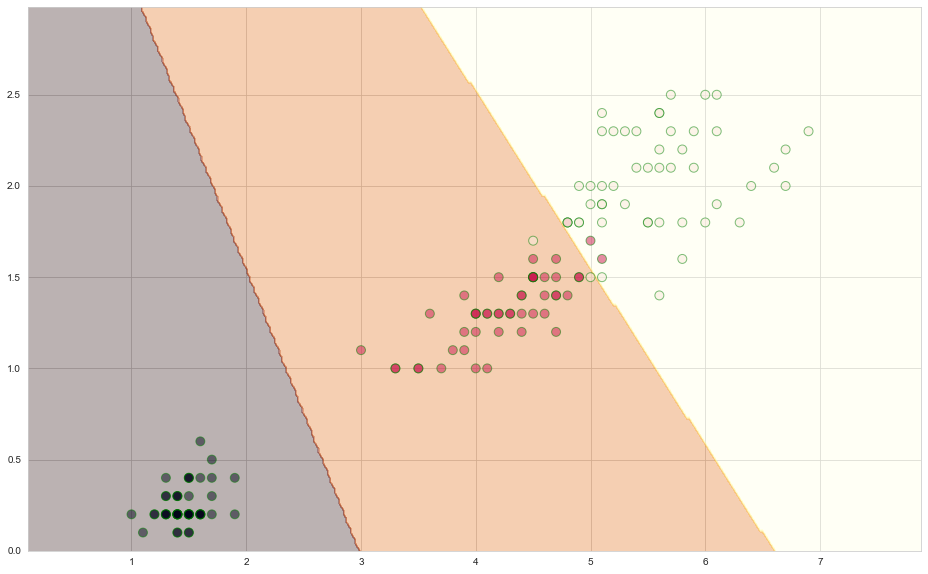

In [11]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx,yy,z,cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:,0], X.values[:,1],c=y,s=80,
           alpha = 0.5, edgecolors = 'g')

In [12]:
<img src = 'img\iris - petal length and width.png' width =60%, height = 60%>

SyntaxError: invalid syntax (Temp/ipykernel_12196/1768384814.py, line 1)

# Linear SVM Implementation

In [13]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa':0,
                 'versicolor':1,
                 'virginica':2}
df['tmp'] = df['species'].map(species_to_num)
y= df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size =0.9,
                                                    random_state=0)

In [14]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [15]:
C = 0.001
clf = svm.SVC(kernel = 'linear', C=C)
clf.fit(X_std_train, y_train)

SVC(C=0.001, kernel='linear')

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [17]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring ='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.4093
Accuracy SD 		 0.1431


In [18]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [19]:
confusion_matrix(y_train,y_train_pred )

array([[47,  0,  0],
       [21,  0, 21],
       [16,  0, 30]], dtype=int64)

In [20]:
print("Precision Score: \t {0:.4f}". format(precision_score(y_train,y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,y_train_pred,
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,y_train_pred,
                                                     average='weighted')))

Precision Score: 	 0.3952
Recall Score: 		 0.5704
F1 Score: 		 0.4606


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [22]:
confusion_matrix(y_test,y_test_pred)

array([[0, 3, 0],
       [0, 8, 0],
       [0, 4, 0]], dtype=int64)

In [23]:
print("Precision Score: \t {0:.4f}". format(precision_score(y_test,y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,y_test_pred,
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,y_test_pred,
                                                     average='weighted')))

Precision Score: 	 0.2844
Recall Score: 		 0.5333
F1 Score: 		 0.3710


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Polynomial SVM Implementation

In [110]:
C = 1
clf = svm.SVC(kernel = 'poly',degree=3, C=C)
clf.fit(X,y)

SVC(C=1, kernel='poly')

In [111]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min , x_max = Xv.min(), Xv.max() + 1
y_min , y_max = y.min(), y.max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                    np.arange(y_min,y_max,h))

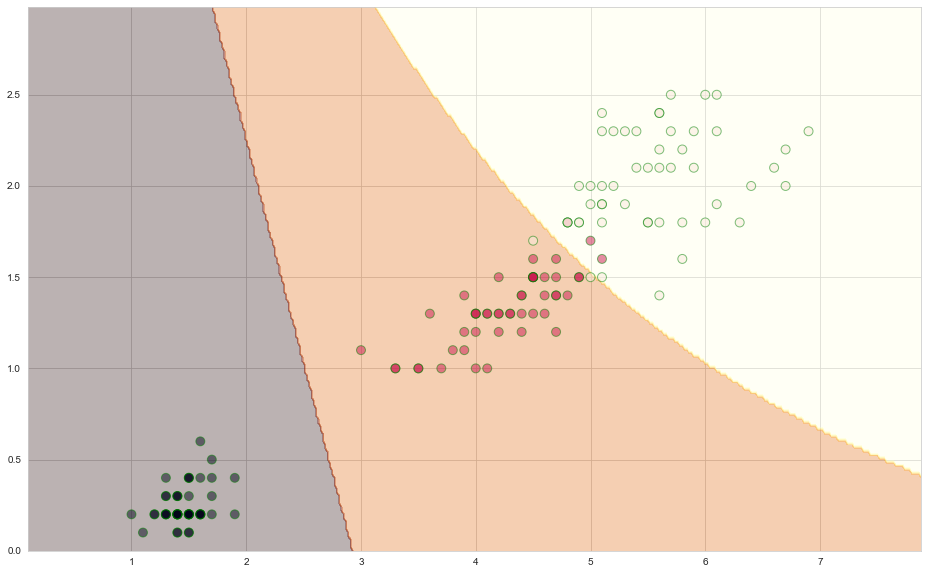

In [112]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx,yy,z,cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:,0], X.values[:,1],c=y,s=80,
           alpha = 0.5, edgecolors = 'g')

In [64]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa':0,
                 'versicolor':1,
                 'virginica':2}
df['tmp'] = df['species'].map(species_to_num)
y= df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size =0.9,
                                                    random_state=0)

In [70]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [72]:
C = 1
clf = svm.SVC(kernel = 'poly',degree=3, C=C)
clf.fit(X_std_train,y_train)

SVC(C=1, kernel='poly')

In [73]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring ='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9560
Accuracy SD 		 0.0481


In [74]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [75]:
confusion_matrix(y_train,y_train_pred)

array([[47,  0,  0],
       [ 0, 42,  0],
       [ 0,  7, 39]], dtype=int64)

In [76]:
print("Precision Score: \t {0:.4f}". format(precision_score(y_train,y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,y_train_pred,
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,y_train_pred,
                                                     average='weighted')))

Precision Score: 	 0.9556
Recall Score: 		 0.9481
F1 Score: 		 0.9480


In [77]:
y_test_pred = cross_val_predict(clf, X_test, y_test, cv=3)

In [78]:
confusion_matrix(y_test, y_test_pred)

array([[3, 0, 0],
       [0, 8, 0],
       [0, 0, 4]], dtype=int64)

In [79]:
print("Precision Score: \t {0:.4f}". format(precision_score(y_test,y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,y_test_pred,
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,y_test_pred,
                                                     average='weighted')))

Precision Score: 	 1.0000
Recall Score: 		 1.0000
F1 Score: 		 1.0000


# 4.Gaussian Radial Basis Function (rbf) 

The kernel function can be any of the following:
 1. Linear:(x,x')
 2. Polynomial:(y(x,x')+r)^d
     d = specified by keyword degree
     r = specified by coef0
 3. rbf: exp(-gama||x-x'||^2)
     gama = is specified by keyowrd gama must be greater than 0
 4. sigmoid : (tan(gama(x,x')+r))
      where r is specified by coef0

In [151]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa':0,
                 'versicolor':1,
                 'virginica':2}
df['tmp'] = df['species'].map(species_to_num)
y= df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size =0.6,
                                                    random_state=0)

In [152]:
#Sclae Feature
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [153]:
C = 1.0
clf = svm.SVC(kernel='rbf', gamma =0.7, C=C)
clf.fit(X_std_train, y_train)

SVC(gamma=0.7)

In [154]:
#Cross Validation with Train Dataset
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring ='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9778
Accuracy SD 		 0.0444


In [155]:
y_train_pred  = cross_val_predict(clf,X_std_train, y_train, cv=3)


In [156]:
confusion_matrix(y_train,y_train_pred)

array([[34,  0,  0],
       [ 0, 25,  2],
       [ 0,  0, 29]], dtype=int64)

In [157]:
print("Precision Score: \t {0:.4f}". format(precision_score(y_train,y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,y_train_pred,
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,y_train_pred,
                                                     average='weighted')))

Precision Score: 	 0.9792
Recall Score: 		 0.9778
F1 Score: 		 0.9777


In [158]:
###Grid Serach

In [159]:
from sklearn.pipeline import Pipeline

In [160]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [161]:
# we can imporve by scaling the features

pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))]) 

In [162]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

In [163]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 

In [164]:
svm_grid_rbf.fit(X_train, y_train) 

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             scoring='accuracy', verbose=1)

In [165]:
svm_grid_rbf.best_score_

0.9777777777777779

In [166]:
best = svm_grid_rbf.best_estimator_.get_params() 

In [167]:
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))

	clf__C: 	 0.10
	clf__gamma: 	 0.25


# Conducting validation in the test database

In [168]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [169]:
confusion_matrix(y_test,y_test_pred)

array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  3, 18]], dtype=int64)

In [170]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred, 
                                                       average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred, 
                                               average='weighted')))

Precision Score: 	 0.9356
Recall Score: 		 0.9333
F1 Score: 		 0.9331


In [175]:
Xv = X.values.reshape(-1,1)
h = 0.04
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

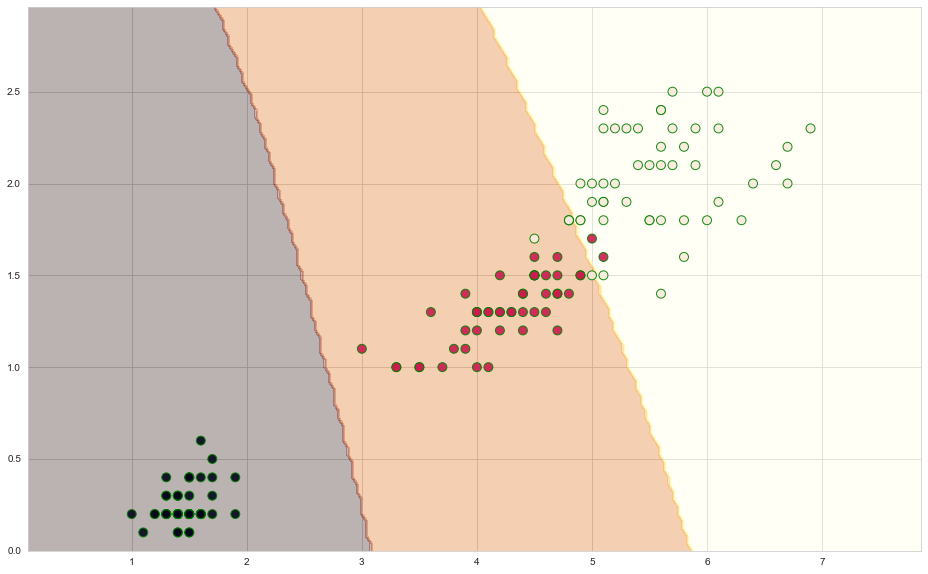

In [176]:
z = svm_grid_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

# Support Vector Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y = boston_data.target
X = df[['LSTAT']].values

In [4]:
svr = SVR()
svr.fit(X, y)

SVR()

In [5]:
sort_idx = X.flatten().argsort()

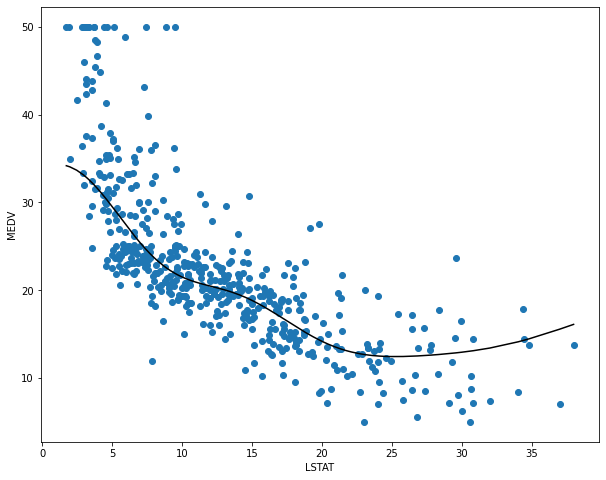

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], svr.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

In [7]:
svr = SVR(kernel = 'linear')
svr.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_train_pred = svr.predict(X_train)

In [ ]:
y_test_pred = svr.predict(X_test)

In [ ]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

In [ ]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

# Polynomial

In [203]:
svr = SVR(kernel='poly', C=1e3, degree=2)
svr.fit(X_train, y_train)

SVR(C=1000.0, degree=2, kernel='poly')

In [204]:
y_train_pred = svr.predict(X_train)
y_train_test = svr.predict(X_test)

In [205]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 0.0495, test: 0.0726
R^2 train: 0.9290, test: 0.8809


# rbf kernel

In [206]:
svr = SVR(kernel ='rbf', C=1e3, gamma = 0.1)
svr.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [207]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [208]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 0.0192, test: 0.0478
R^2 train: 0.9724, test: 0.9215
